In [1]:
import pandas as pd
import re
import pycountry
from geotext import GeoText
import missingno as msno

In [2]:
data = pd.read_csv("job-64bd250cb0899621267166.csv" ,encoding='latin')

# *<span style="color:blue">Data Exploration and Cleansing</span>*

In [ ]:
pd.set_option('display.max_rows', None)
data

In [318]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3198 entries, 0 to 3197
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Company                     3197 non-null   object
 1   Job Title                   3197 non-null   object
 2   Location                    3197 non-null   object
 3   Job Type                    3197 non-null   object
 4   Experience level            2962 non-null   object
 5   Salary                      3009 non-null   object
 6   Requirment of the company   3198 non-null   object
 7   Facilities                  3198 non-null   object
dtypes: object(8)
memory usage: 200.0+ KB


In [319]:
data.describe()

,Company,Job Title,Location,Job Type,Experience level,Salary,Requirment of the company,Facilities
count,3197,3197,3197,3197,2962,3009,3198,3198
unique,1106,2138,1117,3,4,218,2600,777
top,Publicis Groupe,Data Engineer,"Bengaluru, India",Full Time,Senior-level,115K+ *,"Big Data,Business Intelligence,Data analysis,E...",",,,,"
freq,126,105,90,3116,1876,253,12,542


## *<span style="color:green">Duplicate Values</span>*

In [320]:
valeurs_redondant = data.duplicated().sum()

In [321]:
valeurs_redondant

202

In [322]:
data.drop_duplicates(inplace=True)

## *<span style="color:green">Null Values</span>*

In [4]:
valueres_manquants = data.isna().sum()
valueres_manquants

Company                         1
Job Title                       1
Location                        1
Job Type                        1
Experience level              236
Salary                        189
Requirment of the company       0
Facilities                      0
dtype: int64

<Axes: >

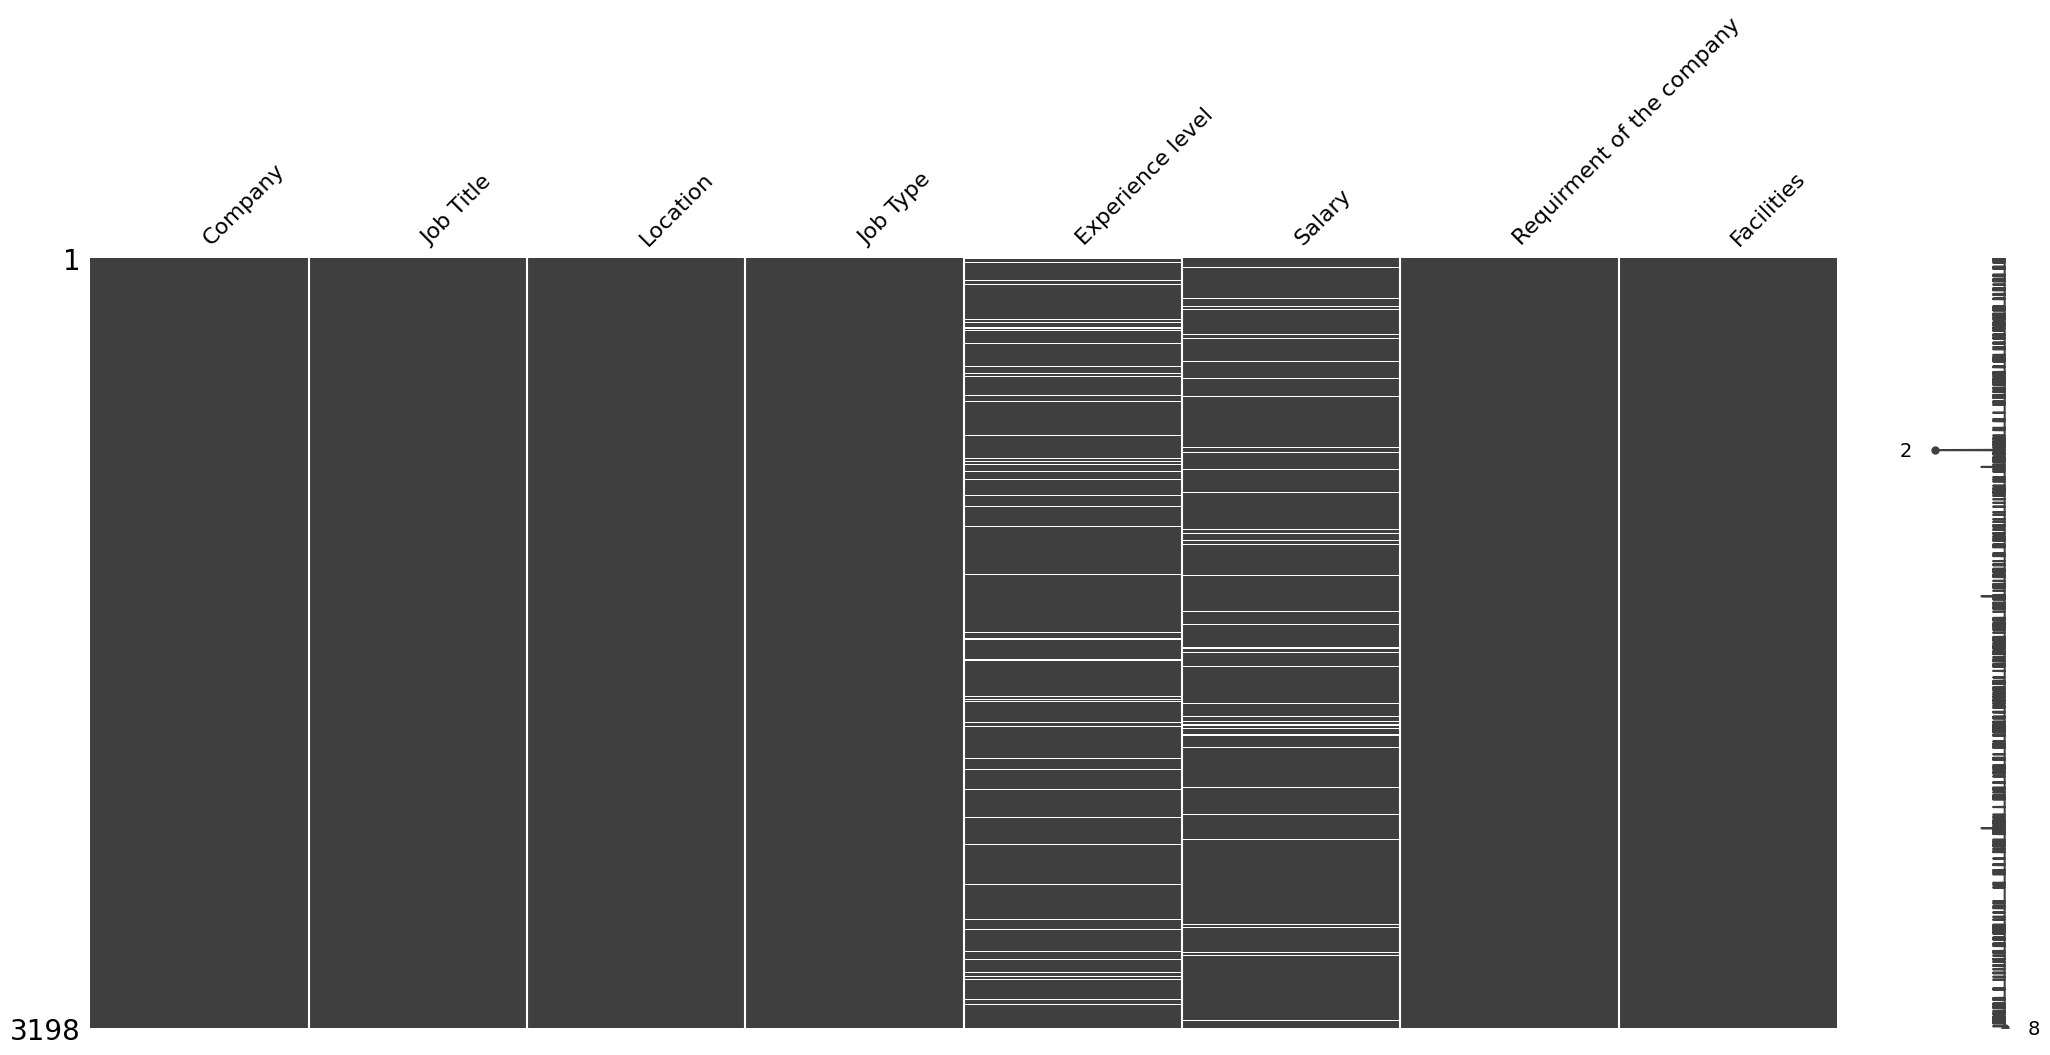

In [3]:
msno.matrix(data)

In [324]:
# check if the Facilities column has some values that are Null but just filled with commas
len(data[data['Facilities'] == ',,,,'])

488

In [ ]:


# Use regex to handle multiple consecutive commas and replace them with a single comma
data['Facilities'] = data['Facilities'].str.replace(r',{2,}', ',')

# Use str.strip() to remove any leading or trailing commas
data['Facilities'] = data['Facilities'].str.strip(',')

pd.set_option('display.max_rows', None)
# Display the updated 'Facilities' column
display(data['Facilities'])

In [392]:
# Fill empty values in the 'Facilities' column with 'Not specified'
data['Facilities'] = data['Facilities'].fillna('Not specified')

In [ ]:
# Fill empty values in the 'Facilities' column with 'Not specified'
data['Company_requirement'] = data['Company_requirement'].fillna('Not specified')

# Use regex to handle multiple consecutive commas and replace them with a single comma
data['Company_requirement'] = data['Company_requirement'].str.replace(r',{2,}', ',')

# Use str.strip() to remove any leading or trailing commas
data['Company_requirement'] = data['Company_requirement'].str.strip(',')

pd.set_option('display.max_rows', None)
# Display the updated 'Facilities' column
display(data['Company_requirement'])

## *<span style="color:green">Comapny</span>*

In [326]:
distinct_comapny = data["Company"].unique().tolist()

In [ ]:
distinct_comapny

In [328]:
len(distinct_comapny)

1107

## *<span style="color:green">Salary</span>*

In [329]:
distinct_Salary = data["Salary"].unique().tolist()

In [ ]:
distinct_Salary

In [331]:
len(distinct_Salary)

219

In [332]:
values_count = data["Salary"].value_counts()

In [ ]:
# Exchange rates dictionary
exchange_rates = {
    'EUR': 1.11,
    'GBP': 1.28,
}

# Function to convert salary to USD
def convert_to_usd(salary):
    try:
        salary_value = float(''.join(filter(lambda x: x.isdigit() or x in ['.', ','], salary)))

        currency_code = re.search(r'[A-Z]{3}', salary)
        if currency_code:
            currency_code = currency_code.group()
        else:
            currency_code = 'USD'

        if currency_code in exchange_rates:
            exchange_rate = exchange_rates[currency_code]
            salary_value *= 1000
            salary_usd = salary_value * exchange_rate
            return salary_usd
        else:
            salary_value *= 1000
            salary_usd = salary_value
            return salary_usd
    except:
        return None

# Apply the conversion function to "Salary" column and create the new "Salary (USD)" column
data['Salary (USD)'] = data['Salary'].apply(convert_to_usd)

# Drop the "Salary" column
data.drop(columns=['Salary'], inplace=True)

# Display the updated DataFrame
pd.set_option('display.max_rows', None)
display(data)


In [334]:
null_salary_counts = data[data['Salary (USD)'].isnull()].groupby('Experience level').size().reset_index(name='Count')

print(null_salary_counts)


  Experience level  Count
0      Entry-level    113
1  Executive-level      5
2        Mid-level      5
3     Senior-level     45


In [ ]:
null_salary_counts = data[data['Experience level'].isnull()].groupby('Salary (USD)').size().reset_index(name='Count')

print(null_salary_counts)


In [336]:
#Replace data null of Salary column with 'No salary'
data['Salary (USD)'].fillna('0',inplace=True)

## *<span style="color:green">Experience level</span>*

In [337]:
#Replace data null of Experience column with 'Not specified'
data['Experience level'].fillna('Not specified',inplace=True)

## *<span style="color:green">Location</span>*

In [338]:
distinct_location = data["Location"].unique().tolist()

In [ ]:
distinct_location

In [340]:
len(distinct_location)

1118

In [391]:
valueres_manquants = data.isna().sum()
valueres_manquants

Company                  0
Job Title                0
Location                 0
Job Type                 0
Experience level         0
Company_requirement      0
Facilities             487
Salary (USD)             0
Job Format               0
country                  0
city                     0
Domain                   0
dtype: int64

In [ ]:
import re
from geotext import GeoText
from geopy.geocoders import Nominatim
import pycountry


# Function to extract job format from the location
def extract_job_format(location):
    patterns = [
        r'Remote\b',
        r'in-[^,]+',
        r'\b(Open\s+to\s+)?Remote\b',
        r'Worldwide\b',
        r'\b(Open\s+to\s+)?\w+\s*\(\w+\)\b',
        r'\b(Open\s+to\s+)?\w+\s*-\s*Remote\b'
    ]

    for pattern in patterns:
        match = re.search(pattern, str(location))
        if match:
            return match.group(0).strip()

    return 'In location'

# Apply the function to the "Location" column to create the "Job Format" column
data['Job Format'] = data['Location'].astype(str).apply(extract_job_format)



from geopy.geocoders import Nominatim
import pycountry

def get_country_from_location(txt):
    """
    Get the country name from the location string.

    Parameters:
        txt (str): The location string.

    Returns:
        str or None: The country name if found, or None if not found.
    """
    if pd.notnull(txt):  # Check if the value is not NaN
        # Create a geolocator instance
        geolocator = Nominatim(user_agent="geoapiExercises")

        # Try to geocode the location string to get location details
        try:
            location = geolocator.geocode(txt, language="en")
            if location and location.address:
                # Search for country name in the address details
                for country in pycountry.countries:
                    if country.name.lower() in location.address.lower():
                        return country.name
        except:
            pass

    return None





def get_city_from_location(txt):
    """
    Get the city name from the location string.

    Parameters:
        txt (str): The location string.

    Returns:
        str or None: The city name if found, or None if not found.
    """
    if pd.notnull(txt):  # Check if the value is not NaN
        geo_text = GeoText(txt)
        cities = geo_text.cities
        if cities:
            return cities[0]
    return None

# Create 'country' and 'city' columns
data['country'] = data['Location'].apply(get_country_from_location)
data['city'] = data['Location'].apply(get_city_from_location)
data

In [343]:

def get_country_from_city(city):
    """
    Get the country name from the city name.

    Parameters:
        city (str): The city name.

    Returns:
        str or None: The country name if found, or None if not found.
    """
    if pd.notnull(city):  # Check if the value is not NaN
        # Create a geolocator instance
        geolocator = Nominatim(user_agent="geoapiExercises")

        # Try to geocode the city name to get location details
        try:
            location = geolocator.geocode(city, language="en")
            if location and location.address:
                # Search for country name in the address details
                for country in pycountry.countries:
                    if country.name.lower() in location.address.lower():
                        return country.name
        except:
            pass

    return None

# Fill missing values in 'country' column based on 'city' column
data.loc[data['country'].isnull(), 'country'] = data['city'].apply(get_country_from_city)


In [ ]:
# Filter the DataFrame to show rows with null country and Location containing 'remote'
null_country_rows_remote = data.loc[data['country'].isna() & data['Location'].str.contains('remote', case=False, na=False)]

# Print the 'Location' values
print("Location values:")
print(null_country_rows_remote['Location'].values)

# Print the count of each value
print("Count of each value:")
print(null_country_rows_remote['Location'].value_counts())



In [345]:
# Update the 'country' column for the filtered rows
data.loc[data['country'].isna() & data['Location'].str.contains('remote', case=False, na=False), 'country'] = 'Remote Worldwide'


In [346]:
data['country'] = data['country'].fillna('Not exists')

In [395]:
valueres_manquants = data.isna().sum()
valueres_manquants

Company                0
Job Title              0
Location               0
Job Type               0
Experience level       0
Company_requirement    0
Facilities             0
Salary (USD)           0
Job Format             0
country                0
city                   0
Domain                 0
dtype: int64

In [348]:
data['city'].fillna('Not City', inplace= True)

In [349]:
data.to_csv("data_final.csv", index= False)

In [350]:
data = pd.read_csv("data_final.csv")

In [ ]:
data

## <span style="color:green">Job Title</span>

In [352]:
distinct_Job_Title = data["Job Title"].unique().tolist()

In [ ]:
distinct_Job_Title

## *<span style="color:green">Company requirement</span>*

In [354]:
data.rename(columns={'Requirment of the company ': 'Company_requirement'}, inplace=True)


In [396]:
# Fill empty values with "Not specified" in the 'Company_requirement' column
data_filtered['Company_requirement'].fillna('Not specified', inplace=True)


In [ ]:

# Concatenate all the keywords from the entire column into a single string
all_keywords_string = ' '.join(data['Company_requirement'])

# Split the concatenated string into a list of individual keywords
all_keywords_list = all_keywords_string.replace('"', '').split(',')

# Convert the list to a set to remove duplicates, then back to a list to maintain order
distinct_keywords_list = list(set(all_keywords_list))

# Display the distinct list of keywords
print(distinct_keywords_list)


In [ ]:
# Combine the distinct keywords and job titles into a new list named 'keywords'
keywords_list = distinct_keywords_list + distinct_Job_Title

# Display the 'keywords' list
print(keywords_list)

### *<span style="color:green">Les tendances clés du marché de l'emploi en IA, DS et Big Data...</span>*

In [357]:
import re

# Define the function to get the subtitle job based on the 'Job Title' and 'Company_requirement'
def getSubTitleJob(row):
    t = str(row['Job Title'])  # Convert 'Job Title' value to a string
    company_req = row['Company_requirement']
    if pd.notnull(company_req):
        company_req_str = str(company_req)  # Convert 'Company_requirement' value to a string
        t = t + ' ' + company_req_str  # Combine 'Job Title' and 'Company_requirement'

    t = t.upper()

    # Define a dictionary with category names as keys and their corresponding regex keywords as values
    categories_regex = {
        'Artificial Intelligence': ['\\bAI\\b', '\\bARTIFICIAL INTELLIGENCE\\b', '\\bARTIFICIAL INTELLIGENCE ENGINEER\\b', '\\bMACHINE INTELLIGENCE\\b', '\\bartificial\\ intelligence\\b', '\\bartificial\\b', '\\bintelligence\\b', '\\bdirector\\ artificial\\b', '\\bintelligence\\ machine\\b', '\\band\\ machine\\b', '\\bintelligence\\ and\\b', '\\bmachine\\ learning\\b', '\\bmachine\\b', '\\blearning\\b', '\\bdirector\\b', '\\blead\\b', '\\blead\\ kpmg\\b', '\\bkpmg\\b', '\\bkpmg\\ futures\\b', '\\bfutures\\b', '\\bintelligence\\ lead\\b', '\\band\\b', '\\bengineer\\b', '\\bhardware\\ architect\\b'],
        'Data Science': ['\\bDS\\b', '\\bDATA SCIENCE\\b', '\\bDATA SCIENTIST\\b', '\\bDATA SCIENCE ANALYST\\b', '\\bDATA ENGINEERING\\b', '\\bdata\\ science\\b', '\\bscience\\b', '\\bdata\\b', '\\bmanager\\b', '\\bscience\\ manager\\b', '\\bdirector\\b', '\\bscience\\ intern\\b', '\\bof\\b', '\\bdirector\\ data\\b', '\\bintern\\b', '\\bmanager\\ data\\b', '\\bconsultant\\b', '\\bof\\ data\\b', '\\blead\\b', '\\bsenior\\b', '\\bhead\\ of\\b', '\\bhead\\b', '\\bscience\\ lead\\b', '\\bsenior\\ manager\\b', '\\bscientist\\ data\\b'],
        'Big Data': ['\\bBIG DATA\\b', '\\bHADOOP\\b', '\\bSPARK\\b', '\\bBIG DATA ANALYTICS\\b', '\\bbig\\ data\\b', '\\bbig\\b', '\\bengineer\\b', '\\bdata\\b', '\\bdata\\ engineer\\b', '\\bsenior\\ big\\b', '\\bengineer\\ big\\b', '\\bsenior\\b', '\\barchitect\\ big\\b', '\\bsr\\ big\\b', '\\bhadoop\\b', '\\bdevops\\b', '\\bsolutions\\b', '\\bsr\\b', '\\barchitect\\b', '\\bsoftware\\ engineer\\b', '\\bsolutions\\ architect\\b', '\\bspecialist\\b', '\\bsoftware\\b', '\\bdata\\ machine\\b'],
        'Data Engineer': ['\\bDATA ENGINEER\\b', '\\bDATA ENGINEERING\\b', '\\bAirflow\\b'],
        'Data Analyst': ['\\bDATA ANALYST\\b', '\\bDATA ANALYSIS\\b', '\\bDATA ANALYTICS\\b'],
        'Machine Learning': ['\\bMACHINE LEARNING\\b', '\\bML\\b'],
        'Business Intelligence': ['\\bBUSINESS INTELLIGENCE\\b', '\\bDATA ANALYTICS\\b', '\\bDATA VISUALIZATION\\b', '\\bDASHBOARD\\b', '\\bREPORTING\\b', '\\bKEY PERFORMANCE INDICATORS\\b', '\\bBUSINESS REPORTS\\b', '\\bDATA INSIGHTS\\b', '\\bDATA DRIVEN DECISIONS\\b', '\\bBUSINESS METRICS\\b', '\\bBUSINESS ANALYSIS\\b', '\\bBUSINESS STRATEGY\\b']
    }

    # Iterate through the dictionary to check for matches
    for category, keywords in categories_regex.items():
        if any(re.search(regex, t) for regex in keywords):
            return category.title()

    # If no matches found, return the original 'Job Title'
    return t

# Apply the function to create a new column 'New Job Title' in the DataFrame
data['Domain'] = data.apply(getSubTitleJob, axis=1)


In [ ]:
data.head(60)

In [359]:
# Define the columns
columns_to_check = ['Company', 'country', 'Location', 'Job Title', 'Job Type']

# Drop rows with null values in the specified columns
data.dropna(subset=columns_to_check, inplace=True)


In [397]:
data.to_csv("data_final.csv", index= False)

In [398]:
data = pd.read_csv("data_final.csv")

In [ ]:
data